In [1]:
import tensorflow as tf
from tensorflow.keras import layers,Sequential,models

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_dir="D:\\Revature\\Staging Preperation\\Xray Classifcation\\train"
test_dir="D:\\Revature\\Staging Preperation\\Xray Classifcation\\test"

In [4]:
traindatagen=ImageDataGenerator(
    rescale=1./255,  
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [5]:
testdatagen=ImageDataGenerator(rescale=1./255)

In [6]:
train=traindatagen.flow_from_directory(train_dir,target_size=(224,224),batch_size=32,class_mode='categorical')

Found 914 images belonging to 3 classes.


In [7]:
test=testdatagen.flow_from_directory(test_dir,target_size=(224,244),batch_size=32,class_mode='categorical')

Found 316 images belonging to 3 classes.


In [8]:
from tensorflow.keras.applications import VGG16

In [9]:
base=VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))

In [10]:
for i in base.layers:
    i.trainable=True

In [11]:
x=Sequential()

In [12]:
x.add(base)

In [13]:
x.add(layers.Flatten())

In [14]:
x.add(layers.Dense(126,activation='relu'))

In [15]:
x.add(layers.Dense(64,activation='relu'))

In [16]:
x.add(layers.Dense(3,activation='softmax'))

In [17]:
x.compile(optimizer="adam",loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
x.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 126)               3161214   
                                                                 
 dense_1 (Dense)             (None, 64)                8128      
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 17884225 (68.22 MB)
Trainable params: 17884225 (68.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
x.fit(train,                       
    steps_per_epoch=len(train),
    epochs=5
)

Epoch 1/5


29/29 [==============================] - 590s 20s/step - loss: 1.4959 - accuracy: 0.4059
Epoch 2/5
29/29 [==============================] - 668s 23s/step - loss: 1.1073 - accuracy: 0.3993
Epoch 3/5
29/29 [==============================] - 683s 23s/step - loss: 1.1025 - accuracy: 0.3906
Epoch 4/5
29/29 [==============================] - 690s 24s/step - loss: 1.0926 - accuracy: 0.4256
Epoch 5/5
29/29 [==============================] - 731s 25s/step - loss: 1.0933 - accuracy: 0.4147


In [21]:
x.evaluate(test)

10/10 [==============================] - 37s 3s/step - loss: 1.1006 - accuracy: 0.3133


[1.1005582809448242, 0.31329113245010376]

In [22]:
x.save("model.h5")

C:\Users\Bharath Reddy\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [26]:
y_prob = x.predict(test, steps=len(test))
y_true = test.classes  # True labels


10/10 [==============================] - 36s 4s/step


In [27]:
from sklearn.preprocessing import label_binarize

y_true_onehot = label_binarize(y_true, classes=[0, 1, 2])  


In [28]:
import matplotlib.pyplot as plt

C:\Users\Bharath Reddy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_plot\roc_curve.py:171: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")
C:\Users\Bharath Reddy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_plot\roc_curve.py:171: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")
C:\Users\Bharath Reddy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_plot\roc_curve.py:171: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


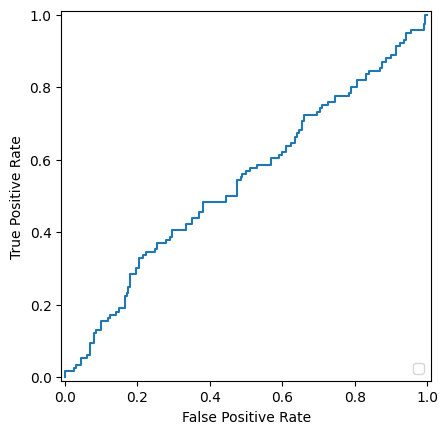

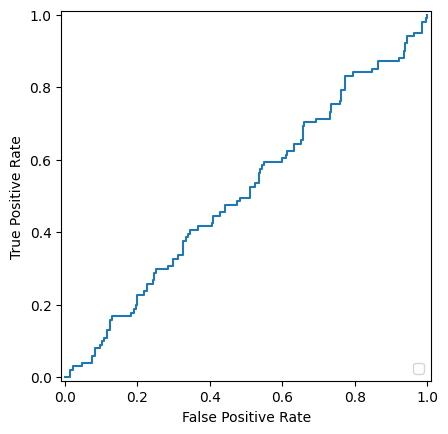

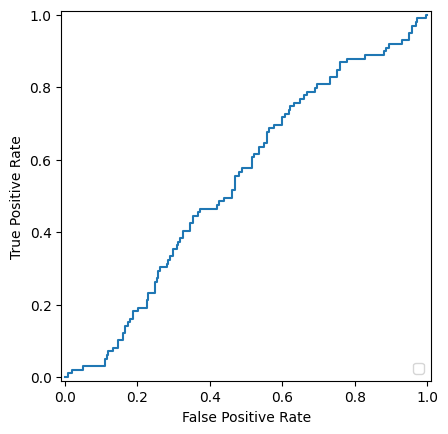

In [29]:
from sklearn.metrics import roc_curve, RocCurveDisplay

for i in range(3):  # Assuming 3 classes
    fpr, tpr, _ = roc_curve(y_true_onehot[:, i], y_prob[:, i])
    
    RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    
plt.show()


In [30]:
from tensorflow.keras.metrics import AUC

auc = AUC(multi_label=True, num_labels=3)

auc.update_state(y_true_onehot, y_prob)

auc_result = auc.result().numpy()
print(f"AUC: {auc_result}")


AUC: 0.5213419795036316
